In [1]:
!pip install factor-analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41444 sha256=a6e3665f4ece49f13e57dbf6e0d91109bf4e1f887ebf62123311970b775beaad
  Stored in directory: c:\users\sdg\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./PCA_raw2.csv")

In [4]:
#데이터 구조 확인(행,열)

df.shape

(250, 17)

In [5]:
#데이터 기술통계 간략확인

df.describe()

,number,입주형태,입주기간,코로나영향,환경개선여부,정화시설,위치규모,비용,환경,인력,행정,시설,교류,인지여부,입주후매출,입주후고용,입주후절감
count,250.00000,250.000000,250.00000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,128.73600,1.288000,1.66000,2.232000,3.393600,2.89600,3.228000,3.028000,2.888000,2.956000,2.804000,3.052000,2.844000,1.588000,2.792000,2.752000,2.676000
std,75.77457,0.453739,0.67097,0.995056,0.792104,0.98848,1.161643,0.889032,0.818619,0.915103,0.819923,1.057245,0.746924,0.493182,0.779208,0.832628,0.707833
min,0.00000,1.000000,1.00000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,62.25000,1.000000,1.00000,1.000000,3.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,129.50000,1.000000,2.00000,2.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,192.75000,2.000000,2.00000,3.000000,4.000000,3.00000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000
max,259.00000,2.000000,3.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000


In [6]:
#컬럼명만 뽑아보자

df.columns

Index(['number', '입주형태', '입주기간', '코로나영향', '환경개선여부', '정화시설', '위치규모', '비용', '환경',
       '인력', '행정', '시설', '교류', '인지여부', '입주후매출', '입주후고용', '입주후절감'],
      dtype='object')

In [7]:
#리스트에 원하는 내용만 담아보자(독립변수만)

items = df.columns.tolist()[1:-3]
items.sort()

In [8]:
items

['교류',
 '비용',
 '시설',
 '위치규모',
 '인력',
 '인지여부',
 '입주기간',
 '입주형태',
 '정화시설',
 '코로나영향',
 '행정',
 '환경',
 '환경개선여부']

In [9]:
#탐색적요인분석(EDA)수행하기

from factor_analyzer import FactorAnalyzer

In [10]:
#요인 개수를 정할 수 있다. 우선 9개로 줄여본다

fa = FactorAnalyzer(n_factors=8, method="ml", rotation="varimax")
fa.fit(df[items])

FactorAnalyzer(method='ml', n_factors=8, rotation='varimax', rotation_kwargs={})

In [11]:
#요인 부하량을 확인한다

fa.loadings_

array([[ 2.94239478e-01,  2.42531458e-01, -2.56183377e-02,
         9.25347812e-02,  3.60798083e-01, -1.93121519e-01,
         2.56998250e-02, -4.08971211e-03],
       [ 5.64049585e-01,  2.11725043e-01,  1.52631230e-01,
         1.66243113e-02,  1.10968765e-01,  8.55751124e-02,
         1.78401530e-01,  9.93989237e-02],
       [ 4.88239494e-01,  3.98828254e-01,  6.93102037e-02,
         1.06488634e-01,  2.65899578e-01,  1.18538925e-01,
        -1.25116390e-02,  3.02069234e-02],
       [ 7.26237485e-01,  1.12304599e-03,  9.25242202e-02,
         1.81461554e-01,  3.21354659e-02, -1.60196347e-01,
        -3.80318523e-02, -9.07745144e-02],
       [ 3.50039193e-01,  3.09412978e-01,  1.17544194e-01,
         8.44075442e-01,  2.16461936e-01, -3.42361012e-02,
        -4.91622197e-02,  3.37606631e-03],
       [-6.52131160e-03, -3.95019559e-02, -4.76372935e-02,
        -1.27762788e-02, -1.07680030e-01,  5.42510777e-01,
         6.66581585e-02,  3.33725136e-02],
       [-3.54272427e-03,  7.365886

In [12]:
#보기 편하게 프레임으로 넣고, 인덱스는 아까 문항번호리스트에 
efa_result= pd.DataFrame(fa.loadings_, index=items)
efa_result
# efa_result.to_csv('./efa3.csv')

,0,1,2,3,4,5,6,7
교류,0.294239,0.242531,-0.025618,0.092535,0.360798,-0.193122,0.025700,-0.004090
비용,0.564050,0.211725,0.152631,0.016624,0.110969,0.085575,0.178402,0.099399
시설,0.488239,0.398828,0.069310,0.106489,0.265900,0.118539,-0.012512,0.030207
위치규모,0.726237,0.001123,0.092524,0.181462,0.032135,-0.160196,-0.038032,-0.090775
인력,0.350039,0.309413,0.117544,0.844075,0.216462,-0.034236,-0.049162,0.003376
인지여부,-0.006521,-0.039502,-0.047637,-0.012776,-0.107680,0.542511,0.066658,0.033373
입주기간,-0.003543,0.073659,0.004036,0.033800,-0.029745,-0.000180,0.048466,-0.230801
입주형태,0.007882,-0.015685,0.024848,-0.017095,-0.024739,0.057640,0.524626,-0.004793
정화시설,0.239691,0.112885,0.940838,0.090212,0.142220,-0.088650,0.050932,-0.028476
코로나영향,-0.038547,0.081364,-0.009267,0.056050,-0.054419,0.038125,0.088602,0.493185


C:\Users\sdg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sdg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

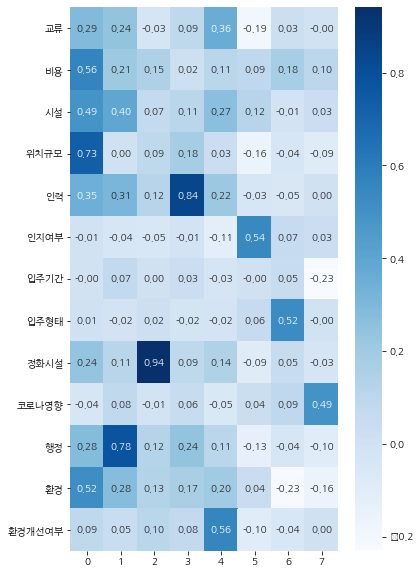

In [13]:
plt.figure(figsize=(6,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

## Cronbach's Alpha(신뢰도 분석)

In [143]:
!pip install scipy --upgrade
!pip install pingouin

Requirement already up-to-date: scipy in c:\users\sdg\anaconda3\lib\site-packages (1.8.1)


In [42]:
import pingouin as pg

In [41]:
df2 = df.iloc[0:,1:]
df2

,입주형태,입주기간,코로나영향,환경개선여부,정화시설,위치규모,비용,환경,인력,행정,시설,교류,인지여부,입주후매출,입주후고용,입주후절감
0,1,1,2,4.0,3,3,2,2,2,2,3,5,1,2,2,3
1,1,1,2,3.0,3,2,3,2,2,2,2,3,2,3,3,3
2,2,2,1,2.0,3,3,3,2,2,3,3,2,2,2,3,2
3,1,1,2,4.0,3,2,3,3,3,2,2,3,2,3,3,2
4,1,1,1,5.0,3,2,3,3,3,2,2,2,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,2,4,3.0,3,4,4,3,4,3,4,3,2,2,2,3
246,2,1,2,3.0,3,4,3,4,4,4,4,3,1,3,3,3
247,1,2,2,3.0,4,4,4,4,4,4,4,3,1,4,4,4
248,1,1,4,5.0,4,5,5,3,3,3,5,3,2,5,5,3


In [43]:
pg.cronbach_alpha(data=df2)

(0.7703898613719667, array([0.727, 0.81 ]))

In [17]:
#신뢰도 계산을 하자 // 이건 신뢰도 구하는 함수공식 누가 해놓은거다아아아

def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [18]:
#위의 요인분석을 바탕으로 문항을 묶어 딕셔너리로 정의하자.

factors = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5', 'factor6', 'factor7', 'factor8']
# factors_items_dict = {}

factors_items_dict = {
    'factor1' : ['환경','시설','비용','위치규모'],
    'factor2' : ['행정'],
    'factor3' : ['정화시설'],
    'factor4' : ['인력'],
    'factor5' : ['교류','환경개선여부'],
    'factor6' : ['인지여부'],
    'factor7' : ['입주형태'],
    'factor8' : ['코로나영향']  
}

In [128]:
for factor in factors:
    factors_items_dict[factor] = [x for x in items if x[0] == factor]

In [19]:
factors_items_dict

{'factor1': ['환경', '시설', '비용', '위치규모'],
 'factor2': ['행정'],
 'factor3': ['정화시설'],
 'factor4': ['인력'],
 'factor5': ['교류', '환경개선여부'],
 'factor6': ['인지여부'],
 'factor7': ['입주형태'],
 'factor8': ['코로나영향']}

In [133]:
for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlpha(df[value]))
    print()

레퍼런스 : https://hleecaster.com/python-factor-analysis/